In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

<div style="width:100%;text-align: center;">
    <h1>Dataset Description</h1>
</div>

In [2]:
e1 = pd.read_csv(r'C:\Users\Anutosh\Unselphish-Datasets\completeSpamAssassin.csv')
e2 = pd.read_csv(r'C:\Users\Anutosh\Unselphish-Datasets\enronSpamSubset.csv')
e3 = pd.read_csv(r'C:\Users\Anutosh\Unselphish-Datasets\lingSpam.csv')

**The code loads and reads three email spam datasets:**

1. e1: completeSpamAssassin.csv - A dataset from the SpamAssassin Public Corpus, comprising spam and non-spam emails.

2. e2: enronSpamSubset.csv - A subset of spam emails from the Enron email dataset, collected from the Enron Corporation's communication.

3. e3: lingSpam.csv - Derived from the Ling-Spam Corpus, containing spam and non-spam emails from the University of Waikato.

These datasets offer diverse samples for training and evaluating email spam classification models.

In [3]:
e1.head()

,Unnamed: 0,Body,Label
0,0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,3,##############################################...,1
4,4,I thought you might like these:\n1) Slim Down ...,1


In [4]:
e2.head()

,Unnamed: 0.1,Unnamed: 0,Body,Label
0,2469,2469,Subject: stock promo mover : cwtd\n * * * urge...,1
1,5063,5063,Subject: are you listed in major search engine...,1
2,12564,12564,"Subject: important information thu , 30 jun 20...",1
3,2796,2796,Subject: = ? utf - 8 ? q ? bask your life with...,1
4,1468,1468,"Subject: "" bidstogo "" is places to go , things...",1


In [5]:
e3.head()

,Unnamed: 0,Body,Label
0,0,Subject: great part-time or summer job !\n \n ...,1
1,1,Subject: auto insurance rates too high ?\n \n ...,1
2,2,Subject: do want the best and economical hunti...,1
3,3,Subject: email 57 million people for $ 99\n \n...,1
4,4,Subject: do n't miss these !\n \n attention ! ...,1


<h3>Column Description</h3>
<ul>
    <li>"Unnamed: 0" is an index column.</li>
    <li>"Body" contains the email content.</li>
    <li>"Label" represents the assigned class/category of each email.</li>
</ul>

<div style="width:100%;text-align: center;">
    <h1>Dataset Exploration</h1>
</div>

In [6]:
e1.drop(['Unnamed: 0'],axis=1,inplace=True)
e2.drop(['Unnamed: 0.1','Unnamed: 0'],axis=1,inplace=True)
e3.drop(['Unnamed: 0'],axis=1,inplace=True)

In [7]:
email = pd.concat([e1,e2,e3],axis=0)

In [8]:
email.head()

,Body,Label
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,##############################################...,1
4,I thought you might like these:\n1) Slim Down ...,1


In [9]:
email.sample(10)

,Body,Label
5623,--- Matthias Saou wrote: > Once\nupon a time...,0
5229,> It also strikes me that it will not be very ...,0
6416,Subject: fw : pluto flow line transaction\n lo...,0
2353,"On Fri, 6 Sep 2002, Eugen Leitl wrote:> On Thu...",0
2554,"On Thu, 19 Sep 2002, Bill Stoddard wrote:--]Go...",0
5957,"CNET AnnouncementÂ Â July 26, 2002\nuBid.com\n...",0
2604,",Body,Label\n 0,""Subject: great part-time or s...",0
1361,Subject: can ' t beat these software prices !\...,1
2828,"On 27 Aug 2002 at 15:00, Rohit Khare wrote:\n>...",0
745,Subject: home page\n \n we have a home page : ...,0


In [10]:
# Examine the structure and dimensions of the dataset
print("Dataset shape:", email.shape)

Dataset shape: (18651, 2)


In [11]:
# Understand the column names , non-null count and Dtypes
email.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18651 entries, 0 to 2604
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    18650 non-null  object
 1   Label   18651 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 437.1+ KB


In [12]:
# Investigate missing values
email.isnull().sum()

Body     1
Label    0
dtype: int64

In [13]:
email.iloc

In [14]:
# Drop null cell in Body
email.dropna(inplace=True)

In [15]:
# Drop duplicates values in the dataset
email.drop_duplicates()

,Body,Label
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,##############################################...,1
4,I thought you might like these:\n1) Slim Down ...,1
...,...,...
2600,Subject: computationally - intensive methods i...,0
2601,Subject: books : a survey of american linguist...,0
2602,Subject: wecol ' 98 - - western conference on ...,0
2603,Subject: euralex ' 98 - revised programme\n \n...,0


<h3>Bar Plot</h3>
<h4>This plot displays the distribution of email labels (spam vs. non-spam) in the dataset.</h4>

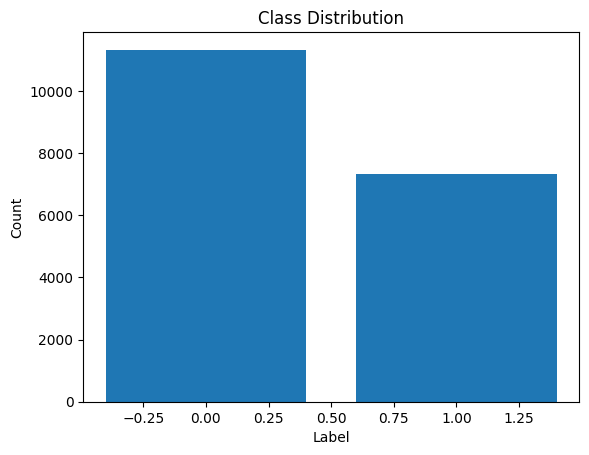

In [16]:
label_counts = email['Label'].value_counts()
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

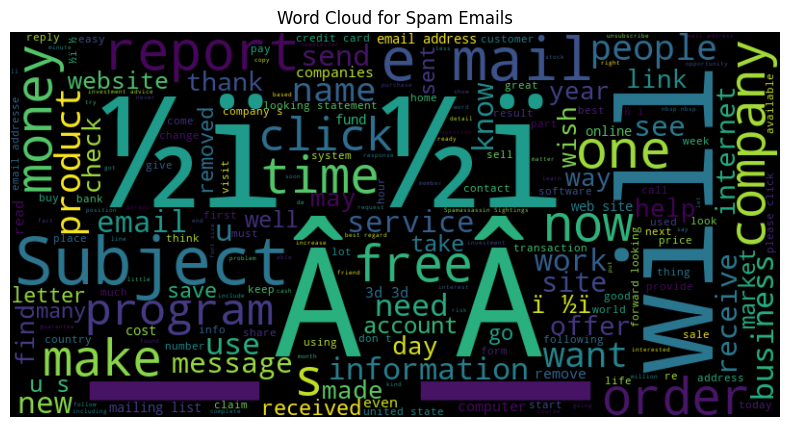

In [17]:
from wordcloud import WordCloud

spam_emails = email[email['Label'] == 1]
spam_emails_with_content = spam_emails[spam_emails['Body'].notnull() & (spam_emails['Body'] != '')]

if not spam_emails_with_content.empty:
    spam_text = spam_emails_with_content['Body'].str.cat(sep=' ')
    wordcloud = WordCloud(width=800, height=400).generate(spam_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud for Spam Emails')
    plt.show()
else:
    print("No spam emails with content found.")


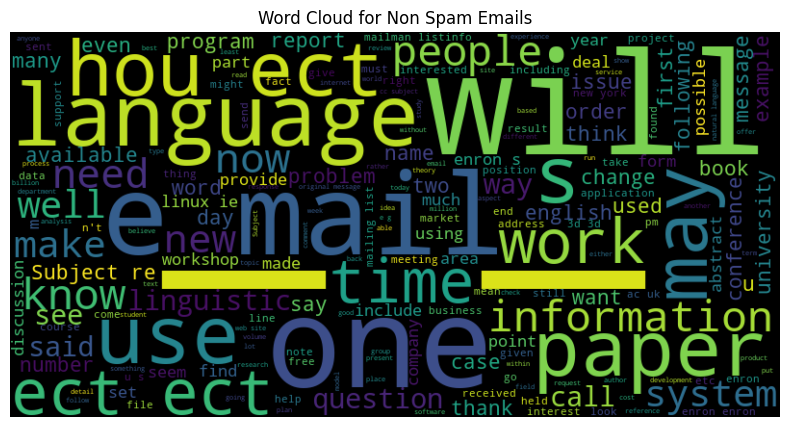

In [18]:
spam_emails = email[email['Label'] == 0]
spam_emails_with_content = spam_emails[spam_emails['Body'].notnull() & (spam_emails['Body'] != '')]

if not spam_emails_with_content.empty:
    spam_text = spam_emails_with_content['Body'].str.cat(sep=' ')
    wordcloud = WordCloud(width=800, height=400).generate(spam_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud for Non Spam Emails')
    plt.show()
else:
    print("No spam emails with content found.")


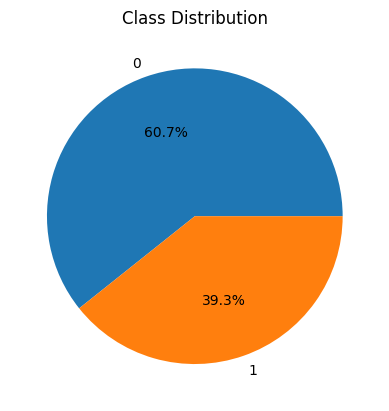

In [19]:
import matplotlib.pyplot as plt

label_counts = email['Label'].value_counts()
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')
plt.title('Class Distribution')
plt.show()


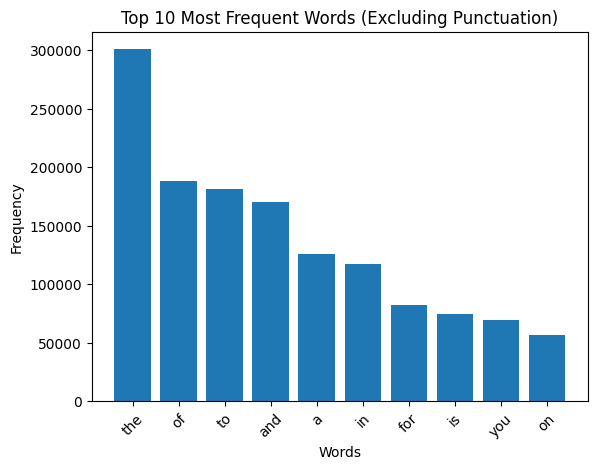

In [20]:
import string
from collections import Counter

# Concatenate all email texts into a single string
all_text = ' '.join(email['Body'].astype(str).tolist())

# Remove punctuation marks from the text
all_text = all_text.translate(str.maketrans('', '', string.punctuation))

# Split the text into individual words and count their frequencies
words = all_text.lower().split()
word_counts = Counter(words)

# Select the top N most frequent words
top_n = 10
top_words = dict(word_counts.most_common(top_n))

# Create a bar plot for the top words
plt.bar(top_words.keys(), top_words.values())
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title(f'Top {top_n} Most Frequent Words (Excluding Punctuation)')
plt.xticks(rotation=45)
plt.show()

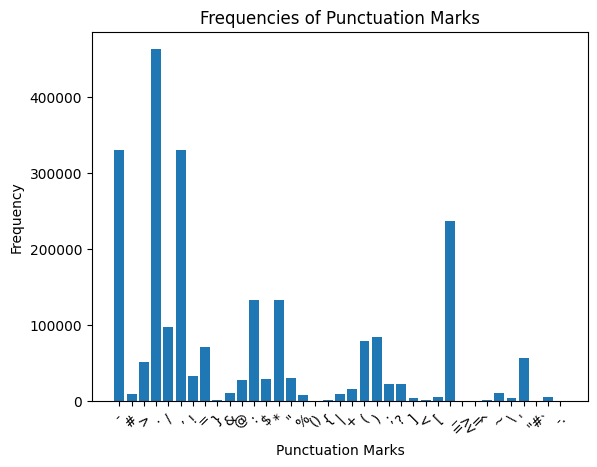

In [21]:
# Concatenate all email texts into a single string
all_text = ' '.join(email['Body'].astype(str).tolist())

# Split the text into individual words
words = all_text.lower().split()

# Filter out words from punctuation marks
punctuation_marks = [word for word in words if word in string.punctuation]

# Count the frequencies of punctuation marks
punctuation_counts = Counter(punctuation_marks)

# Create a bar plot for punctuation frequencies
plt.bar(punctuation_counts.keys(), punctuation_counts.values())
plt.xlabel('Punctuation Marks')
plt.ylabel('Frequency')
plt.title('Frequencies of Punctuation Marks')
plt.xticks(rotation=45)
plt.show()

<div style="width:100%;text-align: center;">
    <h1>Data Preprocessing</h1>
</div>

In [22]:
import re   # Importing the 're' module for regular expression matching and text pattern handling
import nltk   # Importing the 'nltk' library for natural language processing tasks
from nltk.corpus import stopwords   # Importing the 'stopwords' corpus from NLTK to access a list of common stop words
from nltk.stem import PorterStemmer, WordNetLemmatizer   # Importing stemmers and lemmatizers from NLTK for word normalization
from sklearn.feature_extraction.text import TfidfVectorizer   # Importing TfidfVectorizer from scikit-learn for text vectorization

In [23]:
# Lowercase text
email['Body'] = email['Body'].str.lower()

In [24]:
# Remove punctuation
email['Body'] = email['Body'].apply(lambda x: re.sub('[^\w\s]', '', x))

In [25]:
stopwords_set = set(stopwords.words('english'))
email['Body'] = email['Body'].apply(lambda x: ' '.join([word for word in nltk.word_tokenize(x) if word not in stopwords_set]))

In [26]:
# Vectorization (TF-IDF)
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(email['Body'])

In [27]:
# Stemming
stemmer = PorterStemmer()
email['Body'] = email['Body'].apply(lambda x: ' '.join([stemmer.stem(word) for word in nltk.word_tokenize(x)]))

In [28]:
# Lemmatization
# lemmatizer = WordNetLemmatizer()
# email['Body'] = email['Body'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(x)]))
# We have not perfromed Lemmatization here


<div style="width:100%;text-align: center;">
    <h1>Feature Engineering</h1>
</div>

* **BoW representation:** Counts word frequencies to capture occurrence patterns.
* **TF-IDF representation:** Weights words based on importance in documents and across the corpus.

In [29]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Bag-of-Words (BoW) representation
vectorizer_bow = CountVectorizer()
bow_matrix = vectorizer_bow.fit_transform(email['Body'])

# TF-IDF representation
vectorizer_tfidf = TfidfVectorizer()
tfidf_matrix = vectorizer_tfidf.fit_transform(email['Body'])

<div style="width:100%;text-align: center;">
    <h1>Model Selection</h1>
</div>

In [30]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import pickle

In [31]:
# Define the models in a list
rfc = RandomForestClassifier()
model1 = Pipeline([('vectorizer',vectorizer_bow),('classifier',rfc)])
mnb = MultinomialNB()
model2 = Pipeline([('vectorizer',vectorizer_bow),('classifier',mnb)])

models = [
    model1,
    model2
]

In [32]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(email['Body'], email['Label'], test_size=0.2, random_state=42)

In [33]:
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    model_name = type(model).__name__
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("---")

Model: Pipeline
Accuracy: 0.9611260053619303
Precision: 0.9478957915831663
Recall: 0.9549125168236877
F1 Score: 0.9513912168957425
---
Model: Pipeline
Accuracy: 0.9554959785522789
Precision: 0.923620025673941
Recall: 0.968371467025572
F1 Score: 0.9454664914586071
---


<h3><strong>Random Forest</strong> is chosen due to its high accuracy and F1 score, indicating robust performance in handling complex classification tasks. Its ability to capture non-linear relationships, handle high-dimensional data, and provide good generalization makes it a suitable choice for the email dataset.<h3>

# MODEL TESTING AND AUTOMATION

In [39]:
best_model = models[0]

email = ["Guess what? You have been shortlisted to win a free HP Laptop. Yes, absolutely free!! It is a one-time oppurtunity. Don't miss this!! Txt on 9876543234 to claim your reward now", "Alert!! Win a free Apple watch today. Call at 0987657654 to claim your reward. Hurry! Don't Miss this one-time opportunity!!"]
prediction = best_model.predict(email)
percent = best_model.predict_proba(email)
pickle.dump(best_model, open(r"C:\Users\Anutosh\Unselphish-root\Unselphish\ai_ml\Spam_Model_RFC.sav", 'wb'))

print(prediction, percent)

[1 1] [[0.37 0.63]
 [0.35 0.65]]
